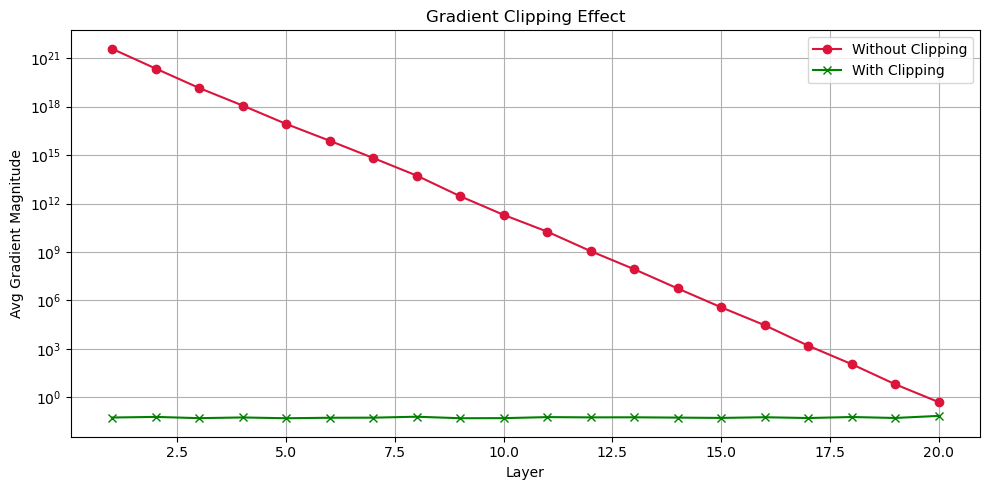

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Gradient clipping function
def clip_gradient(grad, threshold):
    norm = np.linalg.norm(grad)
    if norm > threshold:
        grad = grad * (threshold / norm)
    return grad

# Settings
np.random.seed(42)
input_data = np.random.randn(1, 100)
num_layers = 20
layer_sizes = [100] * num_layers

# Simulate large weights to cause exploding gradients
weights = [np.random.randn(100, 100) * 2.0 for _ in range(num_layers)]

# Forward pass
activations = [input_data]
zs = []

for w in weights:
    z = activations[-1] @ w
    zs.append(z)
    activations.append(relu(z))

# Backward pass: with and without gradient clipping
grad = np.ones_like(activations[-1])
grad_clipped = grad.copy()

mags = []           # No clipping
mags_clipped = []   # With clipping
clip_threshold = 1.0

for i in reversed(range(num_layers)):
    dz = relu_derivative(zs[i])

    grad = grad * dz
    mags.append(np.mean(np.abs(grad)))
    grad = grad @ weights[i].T

    grad_clipped = grad_clipped * dz
    grad_clipped = clip_gradient(grad_clipped, clip_threshold)
    mags_clipped.append(np.mean(np.abs(grad_clipped)))
    grad_clipped = grad_clipped @ weights[i].T

mags.reverse()
mags_clipped.reverse()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_layers + 1), mags, label='Without Clipping', color='crimson', marker='o')
plt.plot(range(1, num_layers + 1), mags_clipped, label='With Clipping', color='green', marker='x')
plt.yscale("log")
plt.xlabel("Layer")
plt.ylabel("Avg Gradient Magnitude")
plt.title("Gradient Clipping Effect")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
